<a href="https://colab.research.google.com/github/tago893/Awesome_CV/blob/main/Fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Predictions with ARIMA

## Contents:
* [Monthly Forecasting](#monthlyForecasting)
    * [Stationarity check and Seasonal decomposition](#StationarityCheck)
    * [Transformation](#Transformation)
    * [Differencing](#Differencing)
        * [Seasonal differentiation](#SeasonalDifferentiation")
        * [Regular differentiation](#RegularDifferentiation")
    * [Autocorrelation](#Autocorrelation")
    * [ARIMAModel](#ARIMAModel")
        * [Analysis of Results](#AnalysisARIMA")
        * [PredictionARIMA](#PredictionARIMA")

In [3]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 223.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 143.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 220.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.

In [19]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from scipy import stats

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [25]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=365*2)).strftime('%Y-%m-%d')

# Retrieving data from Yahoo Finance
data = pdr.get_data_yahoo("ETH-USD",start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [21]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,22906118718
2021-03-05,1541.541748,1547.878174,1450.891357,1533.275024,1533.275024,21067146937
2021-03-06,1532.372803,1669.106567,1519.141113,1654.741577,1654.741577,22746262366
2021-03-07,1655.392456,1730.924194,1636.564453,1723.153809,1723.153809,23809935410
2021-03-08,1724.229248,1835.192139,1670.942017,1834.727905,1834.727905,27630991158
...,...,...,...,...,...,...
2023-02-27,1640.763672,1662.575684,1615.387939,1634.326416,1634.326416,7239824677
2023-02-28,1634.502441,1644.435791,1602.428101,1605.895142,1605.895142,6323676957
2023-03-01,1606.040405,1663.433716,1601.548584,1663.433716,1663.433716,7701847224


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2021-03-04 to 2023-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       730 non-null    float64
 1   High       730 non-null    float64
 2   Low        730 non-null    float64
 3   Close      730 non-null    float64
 4   Adj Close  730 non-null    float64
 5   Volume     730 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


In [9]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualization


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

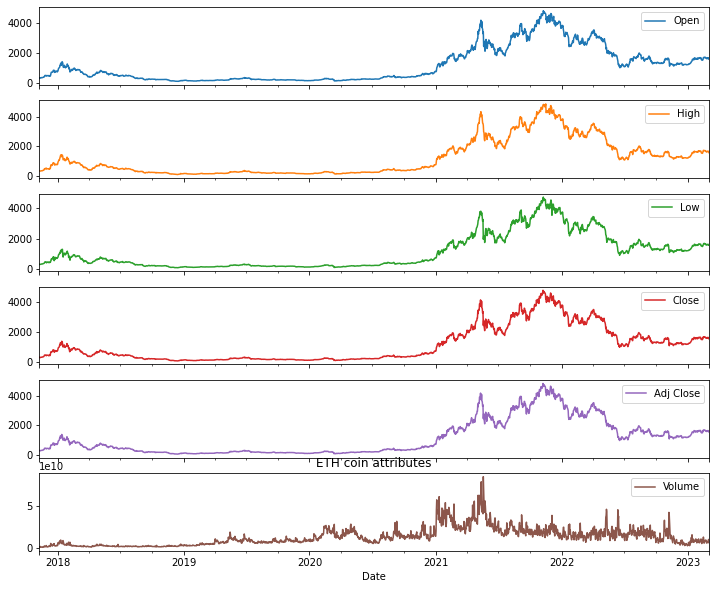

In [11]:
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close','Volume']
data[selected_columns].plot(subplots=True, figsize=(12,10))
plt.title('ETH coin attributes')
plt.show()

In [12]:
df2=pdr.get_data_yahoo("ETH-USD")
del df2["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [13]:
df2.describe()

,Open,High,Low,Close,Volume
count,1942.000000,1942.000000,1942.000000,1942.000000,1.942000e+03
mean,1142.991962,1179.112811,1102.186795,1143.408719,1.272819e+10
std,1171.672557,1207.257168,1130.554815,1171.091155,1.066246e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,214.323799,220.246418,208.710354,214.295589,4.558415e+09
50%,560.891113,581.254242,540.786835,563.559998,1.031033e+10
75%,1715.794861,1759.398468,1672.195099,1715.812286,1.797717e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10


# Monthly Forecasting <a name="monthlyForecasting"></a>

This plot helps us visualize the max and min values of monthly helping us
infering that:

1. 30th november 2021 has the high maximum price and 31st december 2018 has high minimum price compared to other years
2. From year 2019 to 2020 the maximum and minimum closing prices of Ethereum closing price are near.

In [14]:
df2_daily=df2.resample(rule="D").mean()

In [15]:
df2_daily

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,1.041890e+09
...,...,...,...,...,...
2023-02-28,1634.502441,1644.435791,1602.428101,1605.895142,6.323677e+09
2023-03-01,1606.040405,1663.433716,1601.548584,1663.433716,7.701847e+09
2023-03-02,1663.549072,1672.051147,1622.599976,1647.319336,7.080951e+09


<AxesSubplot:xlabel='Date'>

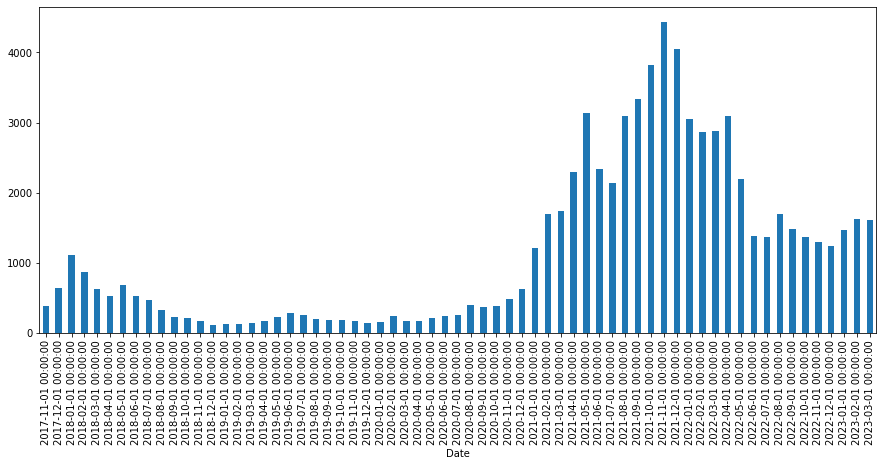

In [16]:
df2['Close'].resample(rule='MS').mean().plot(kind="bar",figsize=(15,6))

#Fb Prophet Model

In [17]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

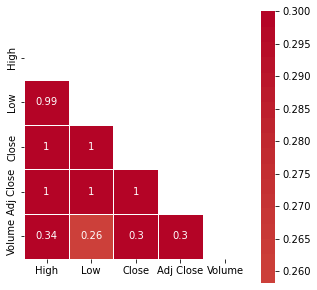

In [27]:
plt.figure(figsize=(5,5))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [28]:
prophet_df=data[['Date','Close']]
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

KeyError: ignored